In [84]:
#In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

1st Objective - Scatter Plots

In [85]:
#Your first objective is to build a series of scatter plots to showcase the following relationships:

#* Temperature (F) vs. Latitude
#* Humidity (%) vs. Latitude
#* Cloudiness (%) vs. Latitude
#* Wind Speed (mph) vs. Latitude

#After each plot add a sentence or two explaining what the code is and analyzing.

In [86]:
#Import dependencies
from citipy import citipy
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from config import api_key
import random
import decimal
import requests

In [87]:
###########create random list of latitudes and longitude - REPLACE 5 WITH 500 LATER ON
latitudes = []
longitudes = []

for i in range(0,5):
    x = float(decimal.Decimal(random.randint(100,18000))/100)
    latitudes.append(x)

lat_df = pd.DataFrame(latitudes, columns = ["Latitude"])

for y in range(0,5):
    y = float(decimal.Decimal(random.randint(100,18000))/100)
    longitudes.append(y)

long_df = pd.DataFrame(longitudes, columns=["Longitude"])

In [88]:
#combine Latitude and Longitude lists to get coordinates
coord_df = pd.concat([lat_df,long_df], axis=1)

coord_df.head()

,Latitude,Longitude
0,45.45,79.37
1,25.91,161.04
2,69.98,125.81
3,66.80,101.83
4,33.16,178.61


In [89]:
#find city closest to the coordinates created
#loop through the latitude and longitude for each set of coords to pull city from citipy
cities = []
cc = []
for index, row in coord_df.iterrows():
    lat = row["Latitude"]
    long = row["Longitude"]

    city = citipy.nearest_city(lat,long)
    cities.append(city.city_name)
print(cities)

cities_df = pd.DataFrame(cities, columns = ["City Name"])
cities_df.head()

['sarkand', 'hasaki', 'tiksi', 'tura', 'nikolskoye']


,City Name
0,sarkand
1,hasaki
2,tiksi
3,tura
4,nikolskoye


In [90]:
#set-up URLs
units = "imperial"
base_url = f"http://api.openweathermap.org/data/2.5/weather?units={units}&appid={api_key}&q="


In [95]:
#pull weather data from open weather
temp = []
humid = []
clouds = []
windspeed = []

for city in cities_df["City Name"]:
    response = requests.get(base_url+city).json()
    
    #append the list
    temp.append(response["main"]["temp"])
    humid.append(response["main"]["humidity"])
    clouds.append(response["clouds"]["all"])
    windspeed.append(response["wind"]["speed"])



In [92]:
#Your first objective is to build a series of scatter plots to showcase the following relationships:






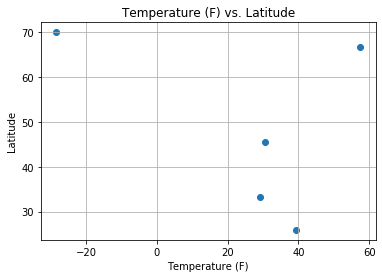

In [98]:
#build temp (f) vs latitude scatterplot
plt.scatter(temp,coord_df["Latitude"], marker = "o")
plt.title("Temperature (F) vs. Latitude")
plt.xlabel("Temperature (F)")
plt.ylabel("Latitude")
plt.grid(True)

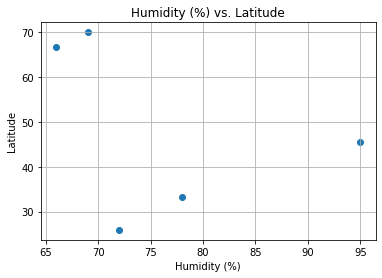

In [99]:
#* Humidity (%) vs. Latitude
plt.scatter(humid,coord_df["Latitude"], marker = "o")
plt.title("Humidity (%) vs. Latitude")
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")
plt.grid(True)


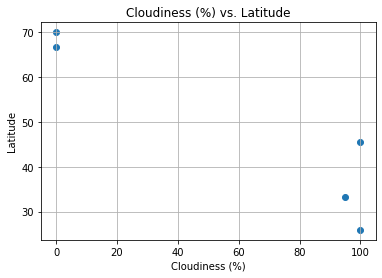

In [100]:
#* Cloudiness (%) vs. Latitude
plt.scatter(clouds,coord_df["Latitude"], marker = "o")
plt.title("Cloudiness (%) vs. Latitude")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")
plt.grid(True)

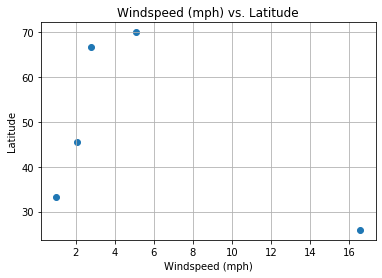

In [101]:
#* Wind Speed (mph) vs. Latitude
plt.scatter(windspeed,coord_df["Latitude"], marker = "o")
plt.title("Windspeed (mph) vs. Latitude")
plt.xlabel("Windspeed (mph)")
plt.ylabel("Latitude")
plt.grid(True)

2nd Objective - Linear Regression

In [93]:
#Your next objective is to run linear regression on each relationship, only this time separating them into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

#* Northern Hemisphere - Temperature (F) vs. Latitude
#* Southern Hemisphere - Temperature (F) vs. Latitude
#* Northern Hemisphere - Humidity (%) vs. Latitude
#* Southern Hemisphere - Humidity (%) vs. Latitude
#* Northern Hemisphere - Cloudiness (%) vs. Latitude
#* Southern Hemisphere - Cloudiness (%) vs. Latitude
#* Northern Hemisphere - Wind Speed (mph) vs. Latitude
#* Southern Hemisphere - Wind Speed (mph) vs. Latitude

#After each pair of plots explain what the linear regression is modelling such as any relationships you notice and any other analysis you may have.

In [94]:
#Your final notebook must:

#* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
#* Perform a weather check on each of the cities using a series of successive API calls.
#* Include a print log of each city as it's being processed with the city number and city name.
#* Save a CSV of all retrieved data and a PNG image for each scatter plot.
